INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4203fef777c6bc778d442bd1c5c903e6 NOW.


Inference for Stan model: anon_model_4203fef777c6bc778d442bd1c5c903e6.
4 chains, each with iter=200; warmup=100; thin=1; 
post-warmup draws per chain=100, total post-warmup draws=400.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta    0.31  3.9e-4 7.8e-3   0.29    0.3   0.31   0.31   0.32    395    1.0
sigma   0.32  2.2e-3   0.02   0.27    0.3   0.32   0.33   0.36     88   1.03
lp__    64.9    0.07   0.86   62.5  64.41  65.16  65.58  65.82    146   1.03

Samples were drawn using NUTS at Thu Aug 22 09:11:26 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E52E21EA58>,
      dtype=object)

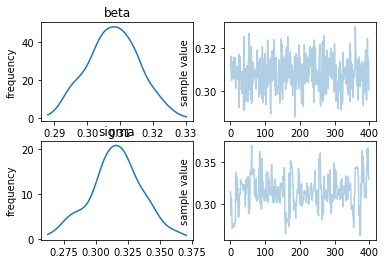

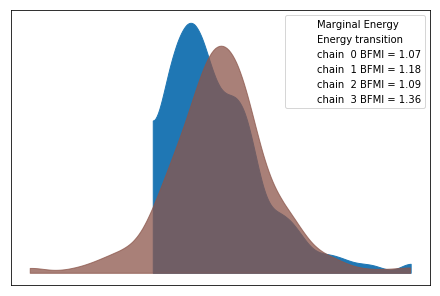

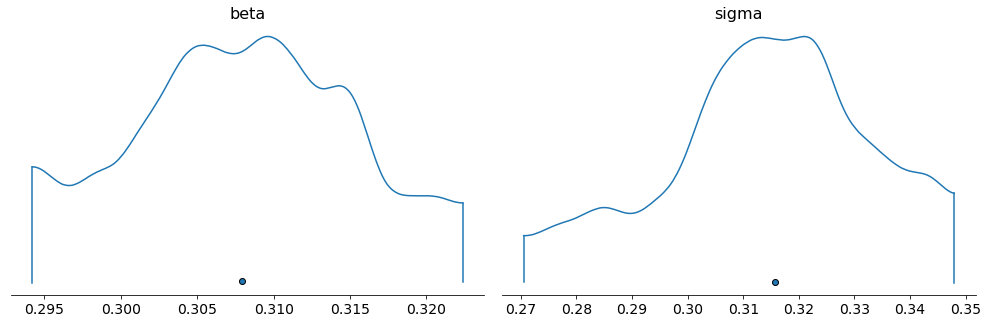

In [2]:
'''
    Example stan model with a user defined function 
    (see chapter 16 in a Student's guide to Bayesian Statistics)
'''

import pystan as stan
import matplotlib as plt
import arviz as az
import numpy as np


N=100 #sample size
X=np.random.normal(60,10,N) #fake weight data

beta=0.3
sigma=0.3 #height population mean

Y=beta*np.log(X)+np.random.normal(0,sigma,N)

#Stan model
model = stan.StanModel(file='aFunction.stan')
fit = model.sampling(data={'Y':Y,'X':X,'N':N}, iter=200,chains=4)
print(fit)

fit.plot()
inf_data = az.convert_to_inference_data(fit)
az.plot_energy(inf_data)
az.plot_density(inf_data)
